In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
np.random.seed(0)
import pandas as pd
from sklearn.model_selection import train_test_split
#from lift_curves import lift_plot_old
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from decile_curves import *

In [2]:
#skin dataset - 3 features and 1 target
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00229/Skin_NonSkin.txt'
skin_data_raw = pd.read_csv(url,sep='\t',names=['x1','x2','x3','target'])
print(skin_data_raw['target'].unique())
skin_data_raw['target']=skin_data_raw['target'].map({1:0,2:1})
skin_data_raw.head()

[1 2]


,x1,x2,x3,target
0,74,85,123,0
1,73,84,122,0
2,72,83,121,0
3,70,81,119,0
4,70,81,119,0


In [3]:
X = skin_data_raw.values[:,:3]
y = skin_data_raw.values[:,3]

In [4]:
#X_test,y_test used for final model evaluation
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

In [5]:
#Random Forest
rf = RandomForestClassifier(n_estimators=10,max_depth=3)
rf.fit(X_train,y_train)
y_pred_proba = rf.predict_proba(X_test)[:, 1]
y_pred = rf.predict(X_test)

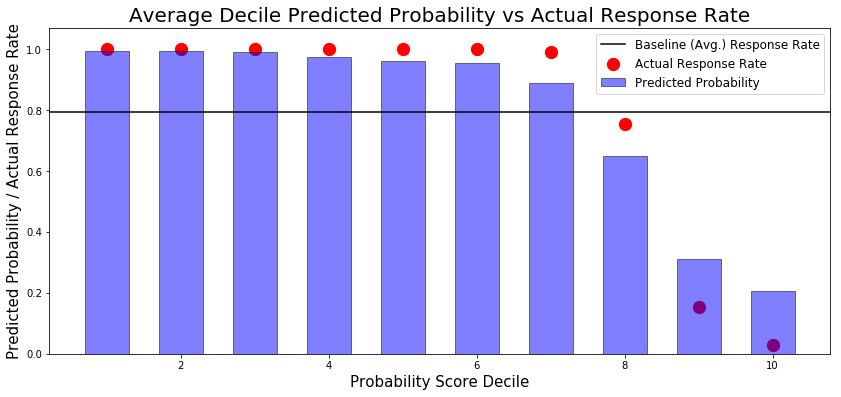

In [17]:
decile_plot(y_test,y_pred_proba,figsize=(14,6),bar_width=0.6,legend='on')